In [1]:
from google.colab import files
uploaded = files.upload()


import sys, os

sys.path
sys.executable

Saving chat-data.zip to chat-data.zip
Saving combined-data.csv to combined-data.csv
Saving flamingo-data.zip to flamingo-data.zip


'/usr/bin/python3'

In [2]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libxtst6 amd64 2:1.2.3-1 [12.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jre-headless amd64 8u362-ga-0ubuntu1~20.04.1 [28.2 MB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jdk-headless amd64 8u362-ga-0ubuntu1~20.04.1 [8,282 kB]
Fetched 36.5

In [3]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2023-05-17 10:24:14--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  99.9KB/s    in 44m 26s 

2023-05-17 11:08:41 (99.9 KB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



In [4]:
!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz

In [5]:
!pip install -q findspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=b99b4fa9d97c37fb0765c214cac92bccbfe4086971614a7796c3db542e6fa594
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [6]:
import os

os.environ["JAVA_HOME"] =  "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"


import findspark

findspark.init()
findspark.find()


'/content/spark-3.2.1-bin-hadoop2.7'

In [63]:
import pyspark


sc = pyspark.SparkContext(master="local[*]", appName="FirstExample")

ValueError: ignored

In [8]:
sc.setLogLevel("ERROR")

In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local").appName("assessment_bigdata").config("spark.ui.port", "4050").getOrCreate()

In [10]:
spark

In [11]:
# UNZIPPING THE DATASET FILES


!unzip "/content/chat-data.zip"
!unzip "/content/flamingo-data.zip"



Archive:  /content/chat-data.zip
   creating: chat-data/
  inflating: __MACOSX/._chat-data    
  inflating: chat-data/chat_leave_team_chat.csv  
  inflating: __MACOSX/chat-data/._chat_leave_team_chat.csv  
  inflating: chat-data/chat_join_team_chat.csv  
  inflating: __MACOSX/chat-data/._chat_join_team_chat.csv  
  inflating: chat-data/chat_respond_team_chat.csv  
  inflating: __MACOSX/chat-data/._chat_respond_team_chat.csv  
  inflating: chat-data/chat_mention_team_chat.csv  
  inflating: __MACOSX/chat-data/._chat_mention_team_chat.csv  
Archive:  /content/flamingo-data.zip
   creating: flamingo-data/
  inflating: __MACOSX/._flamingo-data  
  inflating: flamingo-data/level-events.csv  
  inflating: __MACOSX/flamingo-data/._level-events.csv  
  inflating: flamingo-data/game-clicks.csv  
  inflating: __MACOSX/flamingo-data/._game-clicks.csv  
  inflating: flamingo-data/users.csv  
  inflating: __MACOSX/flamingo-data/._users.csv  
  inflating: flamingo-data/ad-clicks.csv  
  inflating: _

In [12]:

buy_clicks_df = spark.read.csv("/content/flamingo-data/buy-clicks.csv", header=True, inferSchema=True)

In [13]:
buy_clicks_df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- txId: integer (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- team: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- buyId: integer (nullable = true)
 |-- price: double (nullable = true)



In [20]:
buy_clicks_df.show(5)

+-------------------+----+-------------+----+------+-----+-----+
|          timestamp|txId|userSessionId|team|userId|buyId|price|
+-------------------+----+-------------+----+------+-----+-----+
|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|
|2016-05-26 15:36:54|6005|         5775|  35|   868|    4| 10.0|
|2016-05-26 15:36:54|6006|         5679|  97|   819|    5| 20.0|
|2016-05-26 16:36:54|6067|         5665|  18|   121|    2|  3.0|
|2016-05-26 17:06:54|6093|         5709|  11|  2222|    5| 20.0|
+-------------------+----+-------------+----+------+-----+-----+
only showing top 5 rows



In [21]:
buy_clicks_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
timestamp,2947,None,None,2016-05-26 15:36:54,2016-06-16 10:36:54
txId,2947,25443.01085850017,9343.543792592367,6004,39842
userSessionId,2947,22884.75229046488,8669.35362676463,5652,39275
team,2947,70.31896844248388,40.27452540199273,2,178
userId,2947,1187.4591109602986,685.7038088341923,1,2387
buyId,2947,2.530709195792331,1.7799870722907862,0,5
price,2947,7.263997285374957,7.076313004712134,1.0,20.0


In [22]:
############################### EXPLORATORY DATA ANALYSIS

users_df = spark.read.csv("/content/flamingo-data/users.csv", header=True, inferSchema=True)
team_df = spark.read.csv("/content/flamingo-data/team.csv", header=True, inferSchema=True)
adclicks_df = spark.read.csv("/content/flamingo-data/ad-clicks.csv", header=True, inferSchema=True)
buyclicks_df = spark.read.csv("/content/flamingo-data/buy-clicks.csv", header=True, inferSchema=True)

users_df.show(5)





+-------------------+------+-----------+--------+----------+-------+
|          timestamp|userId|       nick| twitter|       dob|country|
+-------------------+------+-----------+--------+----------+-------+
|2012-06-19 14:53:41|   442|   pcjIOBKW|@SZhyOHv|1994-07-20|     BA|
|2012-06-19 19:29:01|   949|    vAOfUkf|  @nkkNo|1971-04-22|     HU|
|2012-06-20 19:34:59|  1654|     qOOXSQ|  @SwOlw|1970-04-19|     IS|
|2012-06-21 01:18:29|  1586|    px4gW51|@IrCHTnE|1965-11-23|     AM|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc| @VJj0Az|1994-08-23|     CC|
+-------------------+------+-----------+--------+----------+-------+
only showing top 5 rows



In [23]:
###### CONVERT DOB TO AGE

from pyspark.sql import functions as f



# Resource for below Code : https://stackoverflow.com/questions/62148704/date-difference-in-years-in-pyspark-dataframe

users_with_age_df = users_df.withColumn("age",   (f.months_between(f.current_date(), f.col('dob')) / 12).cast('int'))

users_with_age_df.show(5)



+-------------------+------+-----------+--------+----------+-------+---+
|          timestamp|userId|       nick| twitter|       dob|country|age|
+-------------------+------+-----------+--------+----------+-------+---+
|2012-06-19 14:53:41|   442|   pcjIOBKW|@SZhyOHv|1994-07-20|     BA| 28|
|2012-06-19 19:29:01|   949|    vAOfUkf|  @nkkNo|1971-04-22|     HU| 52|
|2012-06-20 19:34:59|  1654|     qOOXSQ|  @SwOlw|1970-04-19|     IS| 53|
|2012-06-21 01:18:29|  1586|    px4gW51|@IrCHTnE|1965-11-23|     AM| 57|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc| @VJj0Az|1994-08-23|     CC| 28|
+-------------------+------+-----------+--------+----------+-------+---+
only showing top 5 rows



In [ ]:
# list(users_with_age_df.toPandas()["age"].values)
users_with_age_df.show()

+-------------------+------+-----------+----------+----------+-------+---+
|          timestamp|userId|       nick|   twitter|       dob|country|age|
+-------------------+------+-----------+----------+----------+-------+---+
|2012-06-19 14:53:41|   442|   pcjIOBKW|  @SZhyOHv|1994-07-20|     BA| 28|
|2012-06-19 19:29:01|   949|    vAOfUkf|    @nkkNo|1971-04-22|     HU| 52|
|2012-06-20 19:34:59|  1654|     qOOXSQ|    @SwOlw|1970-04-19|     IS| 53|
|2012-06-21 01:18:29|  1586|    px4gW51|  @IrCHTnE|1965-11-23|     AM| 57|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc|   @VJj0Az|1994-08-23|     CC| 28|
|2012-06-22 11:36:19|   952| BRbb3VOTti|   @b4OK6K|1986-09-11|     MH| 36|
|2012-06-23 08:11:18|  1056|    fGCIAtI| @IgDsdWdU|1991-11-28|     SM| 31|
|2012-06-23 10:54:19|    91|tpDfgi3S0N9|   @LvTHGO|1977-07-03|     BZ| 45|
|2012-06-23 14:59:26|   809| LkNRpRW6Ez|@ROrRkXwdh|1951-09-25|     PF| 71|
|2012-06-23 17:40:35|    75|     fNWewX|   @OXqLyv|1979-11-12|     JO| 43|
|2012-06-23 17:57:05|  22

In [ ]:
users_with_age_df.toPandas()[["age"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2393.0,46.160886,14.070015,24.0,34.0,44.0,57.0,76.0


In [ ]:
from pyspark.sql.functions import udf


age_range = udf(lambda age: '< 20' if age < 20 else 
                       '20-29' if (age >= 20 and age < 30) else
                       '30-39' if (age >= 30 and age < 40) else
                       '40-49' if (age >= 40 and age < 50) else        
                       '50-59' if (age >= 50 and age < 60) else
                       '60-70' if (age >= 60 and age < 70) else
                       '70-79' if (age >= 70 and age < 79) else
                       '80-100' if (age >= 80 and age < 101)  else ""    
                       )

users_with_age_df = users_with_age_df.withColumn('age_group', age_range(users_with_age_df.age))
users_with_age_df.show()

+-------------------+------+-----------+----------+----------+-------+---+---------+
|          timestamp|userId|       nick|   twitter|       dob|country|age|age_group|
+-------------------+------+-----------+----------+----------+-------+---+---------+
|2012-06-19 14:53:41|   442|   pcjIOBKW|  @SZhyOHv|1994-07-20|     BA| 28|    20-29|
|2012-06-19 19:29:01|   949|    vAOfUkf|    @nkkNo|1971-04-22|     HU| 52|    50-59|
|2012-06-20 19:34:59|  1654|     qOOXSQ|    @SwOlw|1970-04-19|     IS| 53|    50-59|
|2012-06-21 01:18:29|  1586|    px4gW51|  @IrCHTnE|1965-11-23|     AM| 57|    50-59|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc|   @VJj0Az|1994-08-23|     CC| 28|    20-29|
|2012-06-22 11:36:19|   952| BRbb3VOTti|   @b4OK6K|1986-09-11|     MH| 36|    30-39|
|2012-06-23 08:11:18|  1056|    fGCIAtI| @IgDsdWdU|1991-11-28|     SM| 31|    30-39|
|2012-06-23 10:54:19|    91|tpDfgi3S0N9|   @LvTHGO|1977-07-03|     BZ| 45|    40-49|
|2012-06-23 14:59:26|   809| LkNRpRW6Ez|@ROrRkXwdh|1951-09-25|   

In [ ]:
data = users_with_age_df.toPandas()
data.loc[data['age']<=19, 'age_group'] = 'teenage'
data.loc[data['age'].between(20,35), 'age_group'] = '20-35'
data.loc[data['age'].between(36,50), 'age_group'] = '36-50'
data.loc[data['age'].between(51,65), 'age_group'] = '51-65'
data.loc[data['age'].between(66,100), 'age_group'] = '66-100'

data



,timestamp,userId,nick,twitter,dob,country,age,age_group
0,2012-06-19 14:53:41,442,pcjIOBKW,@SZhyOHv,1994-07-20,BA,28,20-35
1,2012-06-19 19:29:01,949,vAOfUkf,@nkkNo,1971-04-22,HU,52,51-65
2,2012-06-20 19:34:59,1654,qOOXSQ,@SwOlw,1970-04-19,IS,53,51-65
3,2012-06-21 01:18:29,1586,px4gW51,@IrCHTnE,1965-11-23,AM,57,51-65
4,2012-06-21 15:35:00,599,9gkfwRC73Uc,@VJj0Az,1994-08-23,CC,28,20-35
...,...,...,...,...,...,...,...,...
2388,2016-06-11 05:17:17,2312,CJOHXgqKh,@ZomNVFWoF,1996-10-05,MT,26,20-35
2389,2016-06-14 03:19:04,100,lJexGia,@BYQ14xmNd,1987-05-25,CR,35,20-35
2390,2016-06-14 10:40:22,651,iynipG41EV,@nXTCcg7sV,1987-04-08,CI,36,36-50
2391,2016-06-15 16:33:25,2390,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,32,20-35


In [ ]:
from pyspark.sql import Window
from pyspark.sql.functions import rank,sum,col
import pyspark.sql.functions as f


window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)

w = Window.partitionBy('x')

users_with_age_df_grouped = users_with_age_df.groupBy('age_group').count()\
        .select('age_group', f.col('count').alias('age_group_count'))\
        .sort(f.asc("age_group")) 


users_with_age_df_grouped.show()

+---------+---------------+
|age_group|age_group_count|
+---------+---------------+
|    20-29|            310|
|    30-39|            602|
|    40-49|            552|
|    50-59|            432|
|    60-70|            325|
|    70-79|            172|
+---------+---------------+



In [ ]:
team_df = spark.read.csv("/content/flamingo-data/team.csv", header=True, inferSchema=True)
buyclicks_df = spark.read.csv("/content/flamingo-data/buy-clicks.csv", header=True, inferSchema=True)


team_buying_df = team_df.alias("teamdf").join(buyclicks_df.alias("buyclicks"),\
                            f.col("teamdf.teamId") == f.col("buyclicks.team"),"inner")

team_buying_df_grouped = team_buying_df.groupBy("teamId").sum("price", "strength")\
         .select('teamId', f.col('sum(price)').alias('total_spending'), f.col('sum(strength)').alias('total_strength'))\
         .orderBy("sum(price)")


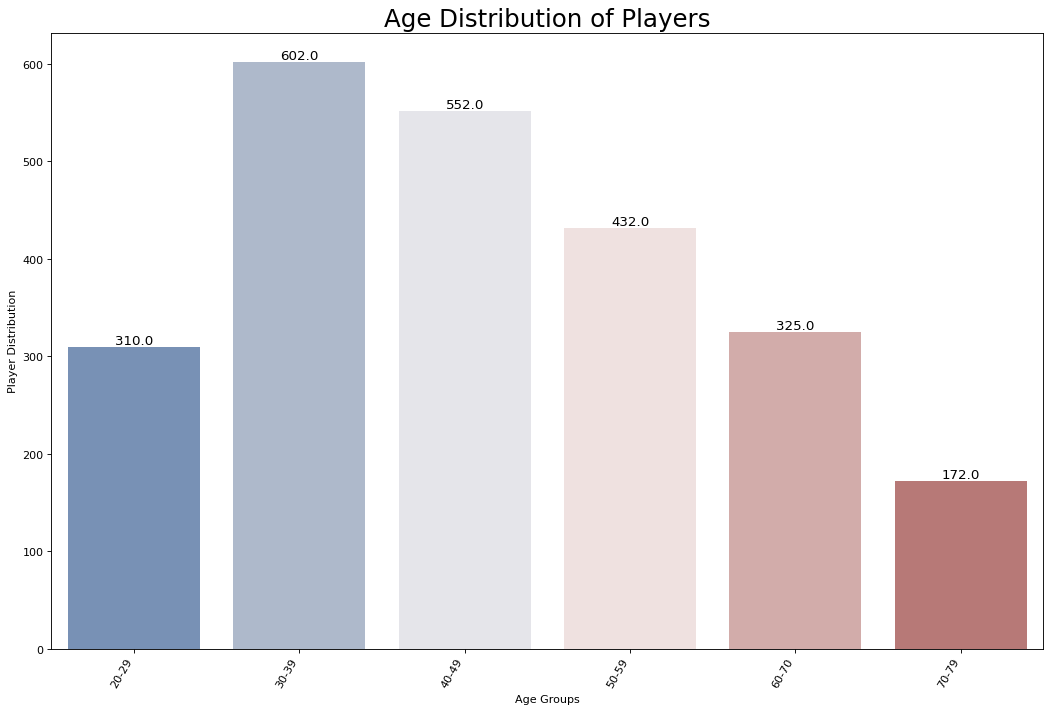

In [ ]:

# users_with_age_df.toPandas().hist(column = "age", bins = 10)
import matplotlib.pyplot as plt
import seaborn as sns

import random

# Import Data
df_raw = users_with_age_df_grouped



# Prepare Data
df = users_with_age_df_grouped.toPandas()
n = users_with_age_df_grouped["age_group"].size+1


all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=7)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
ax = sns.barplot(x="age_group", y="age_group_count", data=df,

                 palette="vlag")

for i, val in enumerate(df['age_group_count'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['age_group'], rotation=60, horizontalalignment= 'right')
plt.title("Age Distribution of Players", fontsize=22)
plt.ylabel('Player Distribution')
plt.xlabel('Age Groups')
plt.show()






In [ ]:
users_with_age_df.groupBy("country").count().orderBy("count").show(6)

+-------+-----+
|country|count|
+-------+-----+
|     UA|    9|
|     SD|    9|
|     EE|    9|
|     MR|    9|
|     CM|    9|
|     AZ|    9|
+-------+-----+
only showing top 6 rows



In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# df = team_buying_df_grouped.toPandas() 

df

,age_group,age_group_count
0,20-29,310
1,30-39,602
2,40-49,552
3,50-59,432
4,60-70,325
5,70-79,172


In [ ]:
!pip install pycountry_convert 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 44.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.2/228.2 kB 11.0 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=d41b07c79ea13cab337486d06dea7bef5c87d349e7dee3958cf1012478aa40c5
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [ ]:
############# TEAM SPENDING WITH AGE GROUP
team_user_buying_df = team_buying_df.alias("team_buying_df").join(users_df.alias("users_df"),\
                           f.col("team_buying_df.userId") == f.col("users_df.userId"),"inner")

In [ ]:
import pycountry_convert as pc
from pyspark.sql.types import StringType



def country_to_continent(country_name):
  try:
    country_continent_code = pc.country_alpha2_to_continent_code(country_name)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
  except:
    return "None"





udf_country_to_continent = f.udf(country_to_continent , StringType())
team_user_buying_df = team_user_buying_df.withColumn("continent", udf_country_to_continent(f.col("country") ))



team_user_buying_df.show()

+------+-----------+-------------------+-------------------+---------------+------------+-------------------+----+-------------+----+------+-----+-----+-------------------+------+----------+----------+----------+-------+-------------+
|teamId|       name|   teamCreationTime|        teamEndTime|       strength|currentLevel|          timestamp|txId|userSessionId|team|userId|buyId|price|          timestamp|userId|      nick|   twitter|       dob|country|    continent|
+------+-----------+-------------------+-------------------+---------------+------------+-------------------+----+-------------+----+------+-----+-----+-------------------+------+----------+----------+----------+-------+-------------+
|     9|  pDG2bAh8T|2016-06-13 17:39:55|9999-12-31 23:59:59| 0.952175553216|           1|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|2013-12-01 09:30:47|  1300|   2hh0NNM|  @RY1URF2|1998-05-06|     GR|       Europe|
|    35|b3PqpjmZ6TT|2016-06-14 02:08:07|9999-12-31 23:59:59|

In [ ]:
from pyspark.sql import Window
from pyspark.sql.functions import rank,sum,col


window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)

team_user_buying_df_stat = team_user_buying_df.groupby("continent").agg(f.sum('price').alias('spending_count'),
                                        f.mean('price').alias('price_avg'),
                                        f.min('price').alias('price_min'),
                                        f.max('price').alias('price_max')).\
   withColumn('total',sum(f.col('spending_count')).over(window)).\
   withColumn('Percent',f.col('spending_count')*100/f.col('total'))

team_user_buying_df_stat.show()

+-------------+--------------+------------------+---------+---------+-------+------------------+
|    continent|spending_count|         price_avg|price_min|price_max|  total|           Percent|
+-------------+--------------+------------------+---------+---------+-------+------------------+
|         None|         684.0|              11.4|      1.0|     20.0|16576.0| 4.126447876447877|
|       Europe|        2974.0| 7.548223350253807|      1.0|     20.0|16576.0|17.941602316602317|
|       Africa|        3889.0| 7.282771535580524|      1.0|     20.0|16576.0|23.461631274131275|
|North America|        2726.0| 7.593314763231198|      1.0|     20.0|16576.0|16.445463320463322|
|   Antarctica|          51.0|             2.125|      1.0|     10.0|16576.0|0.3076737451737452|
|South America|        1416.0|10.114285714285714|      1.0|     20.0|16576.0| 8.542471042471043|
|      Oceania|        1410.0| 5.802469135802469|      1.0|     20.0|16576.0|  8.50627413127413|
|         Asia|        3426.0|

In [ ]:
!pip install squarify 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 45.2 MB/s eta 0:00:00


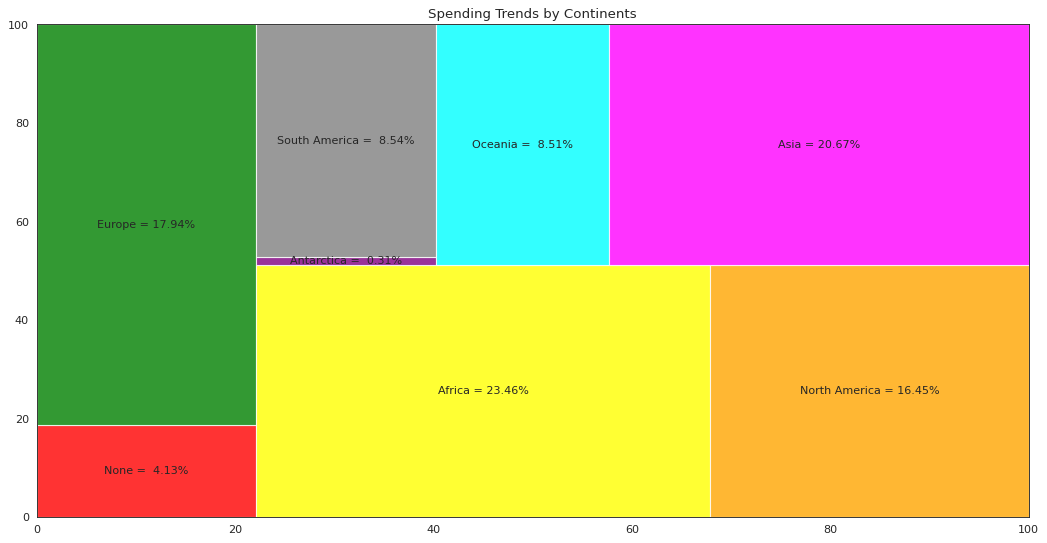

In [ ]:
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd


# Get dataframe continent & Percent columns as list
labels = list(team_user_buying_df_stat.toPandas()["continent"])
sizes =  list(team_user_buying_df_stat.toPandas()["Percent"])

perc = [f'{i/team_user_buying_df_stat.toPandas()["Percent"].sum()*100:5.2f}%' for i in team_user_buying_df_stat.toPandas()["Percent"]]
lbl = [f'{el[0]} = {el[1]}' for el in zip(team_user_buying_df_stat.toPandas()["continent"], perc)]
# Define your custom color palette
custom_colors = ['red', 'green', 'yellow', 'orange', 'purple','grey','cyan','magenta']

# Select colors from the custom palette
colors = custom_colors[:len(labels)]
# select colors
#colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
# plot it
plt.figure(figsize=(16,8), dpi= 80)
squarify.plot(sizes=sizes, label=lbl, color=colors ,alpha=.8 )
plt.title('Spending Trends by Continents')
plt.axis('on')
plt.show()

In [ ]:
team_user_buying_df_stat.show()

+-------------+--------------+------------------+---------+---------+-------+------------------+
|    continent|spending_count|         price_avg|price_min|price_max|  total|           Percent|
+-------------+--------------+------------------+---------+---------+-------+------------------+
|         None|         684.0|              11.4|      1.0|     20.0|16576.0| 4.126447876447877|
|       Europe|        2974.0| 7.548223350253807|      1.0|     20.0|16576.0|17.941602316602317|
|       Africa|        3889.0| 7.282771535580524|      1.0|     20.0|16576.0|23.461631274131275|
|North America|        2726.0| 7.593314763231198|      1.0|     20.0|16576.0|16.445463320463322|
|   Antarctica|          51.0|             2.125|      1.0|     10.0|16576.0|0.3076737451737452|
|South America|        1416.0|10.114285714285714|      1.0|     20.0|16576.0| 8.542471042471043|
|      Oceania|        1410.0| 5.802469135802469|      1.0|     20.0|16576.0|  8.50627413127413|
|         Asia|        3426.0|

In [ ]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
################### TEAM SPENDING AND TEAM RANK CORR



#team_user_buying_df.show()
team_user_buying_df.stat.corr("price","currentLevel")






nan

<Figure size 1280x800 with 0 Axes>

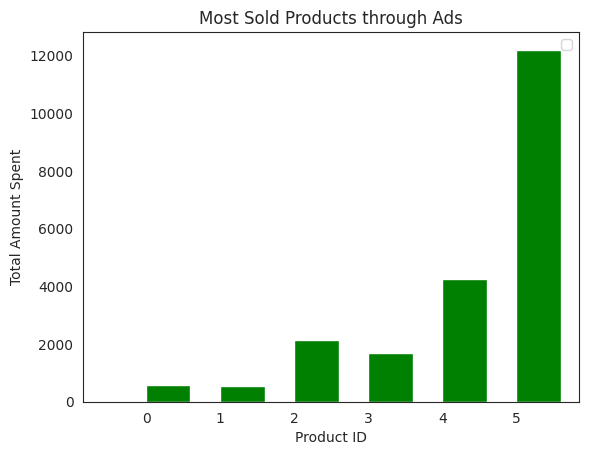

In [ ]:
#################### AD CLICK CHECK 
###### CHECK WHICH ITEM SELLS WELL

from pyspark.sql.functions import rank,sum,col
# import matplotlib.pyplot as plt

adclicks_df = spark.read.csv("/content/flamingo-data/ad-clicks.csv", header=True, inferSchema=True)
buy_clicks_df = spark.read.csv("/content/flamingo-data/buy-clicks.csv", header=True, inferSchema=True)

item_purchases_stat_df = buy_clicks_df.groupby("buyId").agg(sum(f.col("price")).alias("total_price")).orderBy("buyId").toPandas()



item_purchase_stat_df = list(item_purchases_stat_df["buyId"])
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k') 
item_purchases_stat_df.plot.bar(width=1.2, color='green')
plt.xticks(rotation=0)
plt.title("Most Sold Products through Ads")
plt.xlabel('Product ID')
plt.ylabel('Total Amount Spent')
plt.legend([])
# buy_clicks_df.show()



+-------------------+----+-------------+------+------+----+-----------+
|          timestamp|txId|userSessionId|teamId|userId|adId| adCategory|
+-------------------+----+-------------+------+------+----+-----------+
|2016-05-26 15:13:22|5974|         5809|    27|   611|   2|electronics|
|2016-05-26 15:17:24|5976|         5705|    18|  1874|  21|     movies|
|2016-05-26 15:22:52|5978|         5791|    53|  2139|  25|  computers|
|2016-05-26 15:22:57|5973|         5756|    63|   212|  10|    fashion|
|2016-05-26 15:22:58|5980|         5920|     9|  1027|  20|   clothing|
|2016-05-26 15:27:19|5977|         5954|    77|   595|   4|      games|
|2016-05-26 15:28:51|5981|         5674|    54|   770|   6|     movies|
|2016-05-26 15:35:25|5975|         5919|    59|  2133|   3|electronics|
|2016-05-26 15:35:37|5979|         5945|    75|   253|   3|electronics|
|2016-05-26 15:36:38|5972|         5914|    78|  1821|  12|  computers|
|2016-05-26 15:38:42|6000|         5955|    64|  2009|  17|     

<Axes: title={'center': 'Time Series Graph of Adclick per Day'}, xlabel='Days', ylabel='Ads clicked'>

<Figure size 2000x2000 with 0 Axes>

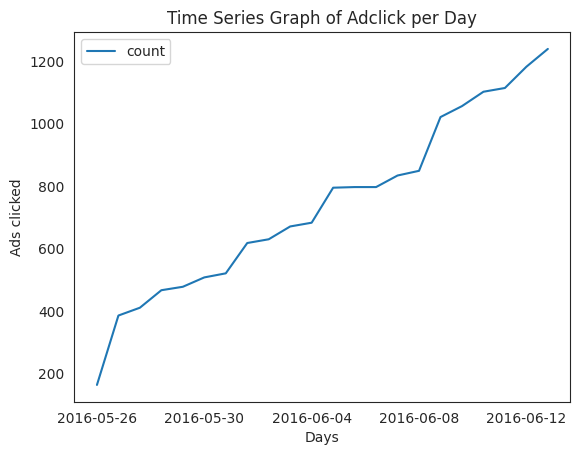

In [ ]:
adclicks_df = spark.read.csv("/content/flamingo-data/ad-clicks.csv", header=True, inferSchema=True)


adclicks_df.show()
#######  FORMAT THE TIMESTAMP COLUMN IN DF AND THEN GROUP BY THE FORMATTED DF 
# To groupby newly created month column which holds  date in yyyy-MM-dd form. 
# count the occurance of each date. as each new date represents a click on ad.
plt.figure(figsize=(20,20))
# adclicks_df.groupby("adCategory").count().orderBy("count").show()
adclicks_df.withColumn("tstamp",f.date_format(adclicks_df.timestamp,'yyyy-MM-dd') )\
.withColumn("hstamp",f.date_format(adclicks_df.timestamp,'hh:mm:ss') )\
.withColumn("month",f.date_format(adclicks_df.timestamp,'yyyy-MM-dd') )\
.select("month")\
.groupBy("month")\
.count()\
.orderBy("count")\
.toPandas()\
.plot.line(x="month", y="count", xlabel="Days", ylabel="Ads clicked", title="Time Series Graph of Adclick per Day")

  platformType  platform_hit_count  total_hits  percentage
0          mac               30582      276852    0.110463
1        linux               53910      498808    0.108078
2      windows              113098     1042214    0.108517
3      android              299576     2747372    0.109041
4       iphone              348976     3066988    0.113785


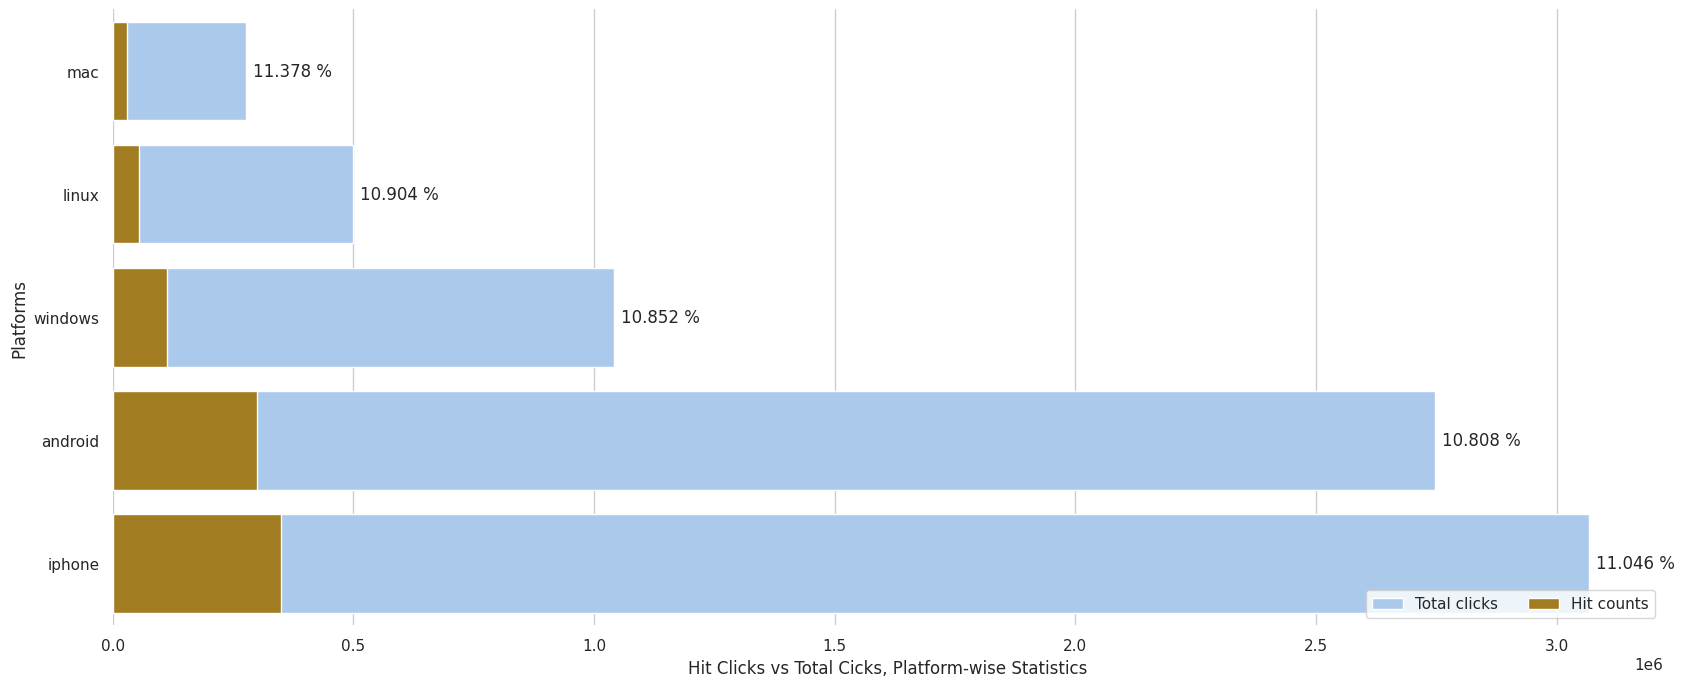

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 8))

# Load the example car crash dataset
crashes = game_clicks_user_session_pf_df.toPandas()

print(crashes.head())

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total_hits", y="platformType", data=crashes,
            label="Total clicks", color="b")


for bar, percentage in zip(ax.patches, crashes['percentage'].values[::-1]):
    ax.annotate( str(round(float(percentage),5) * 100 ) + " %" ,xy=(bar.get_width(), bar.get_y()+bar.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# for bar, percentage in zip(ax.patches, crashes['percentage'].values[::-1]):
#     ax.text(0.8, bar.get_y()+bar.get_height()/2, percentage, color = 'white', ha = 'left', va = 'center')

# for i, val in enumerate(crashes['percentage'].values):
#     ax.text(val, i, str(round(float(val),4) * 100 ) + " %", horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Plot the crashes where alcohol was involved
sns.set_color_codes("dark")
sns.barplot(x="platform_hit_count", y="platformType", data=crashes,
            label="Hit counts", color="y")


# Add a legend and informative axis label

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Platforms",
       xlabel="Hit Clicks vs Total Cicks, Platform-wise Statistics")
sns.despine(left=True, bottom=True)

In [ ]:
############# CORR
from pyspark.sql import functions as f

team_df = spark.read.csv("/content/flamingo-data/team.csv", header=True, inferSchema=True)
buyclicks_df = spark.read.csv("/content/flamingo-data/buy-clicks.csv", header=True, inferSchema=True)


team_buying_df = team_df.alias("teamdf").join(buyclicks_df.alias("buyclicks"),\
                            f.col("teamdf.teamId") == f.col("buyclicks.team"),"inner")



########## HISTOGRAM OF SPENDING COUNT HOW MUCH SPENDING IS DISTRIBUTED && CORRELATION

# team_buying_df.groupBy("teamId").sum("price", "strength").orderBy("sum(price)").toPandas().hist(column = "sum(price)")


team_buying_df_grouped = team_buying_df.groupBy("teamId").sum("price", "strength")\
         .select('teamId', f.col('sum(price)').alias('total_spending'), f.col('sum(strength)').alias('total_strength'))\
         .orderBy("sum(price)")

team_buying_df.stat.corr("price","strength")
# team_buying_df_grouped.show()

-0.06938790495270436

In [14]:
################ CLUSTERING ANALYSIS

# Utility functions for Spark Cluster Analysis Hands-On
#
#
from itertools import cycle, islice
from math import sqrt
from numpy import array
from pandas.plotting import parallel_coordinates
from pyspark.ml.clustering import KMeans as KM
from pyspark.mllib.linalg import DenseVector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def computeCost(featuresAndPrediction, model):
    allClusterCenters = [DenseVector(c) for c in model.clusterCenters()]
    arrayCollection   = featuresAndPrediction.rdd.map(array)

    def error(point, predictedCluster):
        center = allClusterCenters[predictedCluster]
        z      = point - center
        return sqrt((z*z).sum())
    
    return arrayCollection.map(lambda row: error(row[0], row[1])).reduce(lambda x, y: x + y)


def elbow(elbowset, clusters):
	wsseList = []	
	for k in clusters:
		print("Training for cluster size {} ".format(k))
		kmeans = KM(k = k, seed = 1)
		model = kmeans.fit(elbowset)
		transformed = model.transform(elbowset)
		featuresAndPrediction = transformed.select("features", "prediction")

		W = computeCost(featuresAndPrediction, model)
		print("......................WSSE = {} ".format(W))

		wsseList.append(W)
	return wsseList

def elbow_plot(wsseList, clusters):
	wsseDF = pd.DataFrame({'WSSE' : wsseList, 'k' : clusters })
	wsseDF.plot(y='WSSE', x='k', figsize=(15,10), grid=True, marker='o')

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

def parallel_plot(data, P):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(P)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')



In [15]:
df = spark.read.csv("/content/combined-data.csv", header=True, inferSchema=True)

df

DataFrame[userId: int, userSessionId: int, teamLevel: int, platformType: string, count_gameclicks: int, count_hits: int, count_buyId: string, avg_price: string]

In [16]:
df.count()
df.na.drop().count()





4619

In [17]:
df.columns

['userId',
 'userSessionId',
 'teamLevel',
 'platformType',
 'count_gameclicks',
 'count_hits',
 'count_buyId',
 'avg_price']

In [66]:
################ K-MEANS CLUSTERING
ad_click_df = spark.read.csv("/content/flamingo-data/ad-clicks.csv", header=True, inferSchema=True)
buy_click_df = spark.read.csv("/content/flamingo-data/buy-clicks.csv", header=True, inferSchema=True)
game_click_df = spark.read.csv("/content/flamingo-data/game-clicks.csv", header=True, inferSchema=True)
level_events_df = spark.read.csv("/content/flamingo-data/level-events.csv", header=True, inferSchema=True)
team_assignments_df = spark.read.csv("/content/flamingo-data/team-assignments.csv", header=True, inferSchema=True)
team_df = spark.read.csv("/content/flamingo-data/team.csv", header=True, inferSchema=True)
users_df = spark.read.csv("/content/flamingo-data/users.csv", header=True, inferSchema=True)
users_session_df = spark.read.csv("/content/flamingo-data/user-session.csv", header=True, inferSchema=True)












In [65]:
################# JOIN ALL TABLES

whole_dataset_df = team_assignments_df.alias("team_assignment_df").join(users_df.alias("users_df"),\
                           f.col("team_assignment_df.userId") == f.col("users_df.userId"),"inner")\
                           .join(team_df.alias("team_df"), f.col("team_df.teamId") == f.col("team"))\
                           .join(users_session_df.alias("users_session_df"), f.col("users_session_df.userId") == f.col("users_df.userId"))\
                           .join(game_click_df.alias("game_click_df"), f.col("game_click_df.userId") == f.col("users_df.userId"))\
                           .join(ad_click_df.alias("ad_click_df"), f.col("ad_click_df.userId") == f.col("users_df.userId"))\
                           .join(buy_click_df.alias("buy_click_df"), f.col("buy_click_df.userId") == f.col("users_df.userId"))\
                           .select("team_assignment_df.timestamp", "team_assignment_df.timestamp", 
                                   "users_df.userId", "users_df.nick", "users_df.twitter","users_df.country","users_df.dob",
                                   "team_df.teamId","team_df.teamCreationTime", "team_df.teamEndTime", "team_df.strength","team_df.currentLevel",
                                   "users_session_df.timestamp","users_session_df.timestamp", "users_session_df.sessionType","users_session_df.teamLevel","users_session_df.platformType",
                                   "game_click_df.timestamp", "game_click_df.isHit",
                                   "ad_click_df.adId", "ad_click_df.adCategory",
                                   "buy_click_df.txId","buy_click_df.price")\
                          

AttributeError: ignored

In [26]:
whole_dataset_df = whole_dataset_df.select('strength',
 'teamLevel',
 'isHit',
 'price').distinct()

# print(whole_dataset_df.count())


# whole_dataset_df.show()


In [27]:
############# CLASSIFICATION AND CLUSTERING ANALYSIS
import pyspark.sql.functions as f
from pyspark.sql import Window
from pyspark.sql.functions import rank,sum,col


window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)


combined_data_df = spark.read.csv("/content/combined-data.csv", header=True, inferSchema=True)

combined_data_df_na_removed = combined_data_df.na.drop()
# combined_data_df_hitter = combined_data_df.withColumn('Percent',f.col('count_hits')*100/f.col('count_gameclicks'))\
#                           .withColumn("hitter", f.when(f.col("Percent") > 10, 1).otherwise(0))\
#                           .withColumn('total',sum(f.col('avg_price')).over(window))\
#                           .withColumn("spender", f.when(f.col("avg_price") > 5,1).otherwise(0))

                          
combined_data_df_hitter = combined_data_df\
                          .withColumn('total',sum(f.col('avg_price')).over(window))\
                          .withColumn("spender", f.when(f.col("avg_price") > 5,1).otherwise(0))





grouped_userId_combined_data_df  = combined_data_df_hitter.groupby("userId")\
                                  .agg(f.sum("count_gameclicks").alias('count_gameclicks_total'), 
                                       f.sum("count_hits").alias("count_hits_total"), 
                                       f.sum("avg_price").alias("avg_price_total"))\
                                  .withColumn('Percent',f.col('count_hits_total')*100/f.col('count_gameclicks_total'))\
                                  .withColumn("hitter", f.when(f.col("Percent") > 10, 1).otherwise(0))\
                                  


combined_grouped_df = combined_data_df_hitter.alias("combined_data_df_hitter").join(grouped_userId_combined_data_df.alias("grouped_userId_combined_data_df"),\
                           f.col("combined_data_df_hitter.userId") == f.col("grouped_userId_combined_data_df.userId"),"inner")\

                          
combined_grouped_df.show()


# team_user_buying_df_stat = team_user_buying_df.groupby("continent").agg(f.sum('price').alias('spending_count'),
#                                         f.mean('price').alias('price_avg'),
#                                         f.min('price').alias('price_min'),
#                                         f.max('price').alias('price_max')).\
#    withColumn('total',sum(f.col('spending_count')).over(window)).\

# combined_data_df_hitter = combined_data_df_hitter.groupby("userId")\
#                           .agg(f.sum('avg_price').alias('total'))\
#                           .withColumn("spender", f.when(f.col("total") > 5,1).otherwise(0))
# max_value = combined_data_df_hitter.agg({"Percent": "max"}).collect()[0][0]
# print(max_value)
# team_user_buying_df.groupby("continent").agg(f.sum('price').alias('spending_count'),
#                                         f.mean('price').alias('price_avg'),
#                                         f.min('price').alias('price_min'),
#                                         f.max('price').alias('price_max')).\
#    withColumn('total',sum(f.col('spending_count')).over(window)).\
#    withColumn('Percent',f.col('spending_count')*100/f.col('total'))

# combined_data_df.show()
# combined_data





+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|10179.410000000002|      0|   812|                   669|              74|           null|11.061285500747385|     1|
|  1658|         5649|        1|      iphone|              31|         5|       NULL|     NULL|10179.410000000002|      0|  1658|                   403|

In [28]:

##### INDEX THE PLATFORMTYPE CATEGORICAL COLUMN

from pyspark.ml.feature import StringIndexer

# Create an indexer
indexer = StringIndexer(inputCol='platformType', outputCol='platformType_indexed')

# Indexer identifies categories in the data
indexer_model = indexer.fit(combined_grouped_df)

# Indexer creates a new column with numeric index values
combined_grouped_df_indexed = indexer_model.transform(combined_grouped_df)
combined_grouped_df_indexed.show()



+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|10179.410000000002|      0|   812|                   669|              74|           null|11.061285500747385|     1|                 1.0|
|  1658|         5649|        1|      iphone|              31|      

In [29]:
########### FILL NA IN AVG PRICE WITH 0 


combined_grouped_df_indexed = combined_grouped_df_indexed.fillna({'avg_price_total':'0'})

combined_grouped_df_indexed.show()

+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|10179.410000000002|      0|   812|                   669|              74|            0.0|11.061285500747385|     1|                 1.0|
|  1658|         5649|        1|      iphone|              31|      

In [30]:
############## FEATURE VECTORIZATION



from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
featuresUsed = ['Percent',
 'teamLevel',
"count_gameclicks_total",
"count_hits_total",
"platformType_indexed"
 ]



assembler = VectorAssembler(inputCols=featuresUsed,  outputCol='features')
assembled = assembler.transform(combined_grouped_df_indexed)

# assembled.show()

# assembled  = assembled.select(featuresUsed)
# Split into training and test sets in a 80:20 ratio
combined_grouped_data_train, combined_grouped_data_test = assembled.randomSplit([0.8, 0.2], seed=17)


combined_grouped_data_train.show()


+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|            features|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+
|     0|        24943|        2|      iphone|             353|        35|       NULL|     NULL|10179.410000000002|      0|     0|                  1240|             124|            0.0|              10.0|     0|                 0.0|[10.0,

In [31]:


# scaler = StandardScaler(inputCol="features_unscaled", outputCol="features", withStd=True, withMean=True)
# scalerModel = scaler.fit(assembled)
# scaledData = scalerModel.transform(assembled)



In [32]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    KMeans_algo=KMeans(featuresCol='features', k=i)
    KMeans_fit=KMeans_algo.fit(combined_grouped_data_train)
    output=KMeans_fit.transform(combined_grouped_data_train)
    score=evaluator.evaluate(output)
    silhouette_score.append(score)
    print("Silhouette Score:",score)

Silhouette Score: 0.8826632454216913
Silhouette Score: 0.6817104209006823
Silhouette Score: 0.7154837804062976
Silhouette Score: 0.7301533506388718
Silhouette Score: 0.6989287234662358
Silhouette Score: 0.6800344429798587
Silhouette Score: 0.7046113203281112
Silhouette Score: 0.702220691099243


Text(0, 0.5, 'cost')

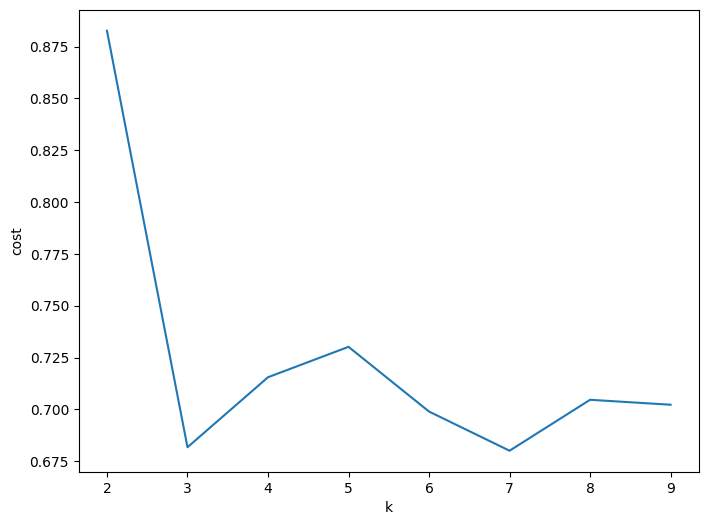

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [34]:
final_clustering=KMeans(featuresCol='standardized', k=3)
KMeans_fit=KMeans_algo.fit(combined_grouped_data_test)
clusters_output=KMeans_fit.transform(combined_grouped_data_test)
clusters_output.show()

+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+----------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|            features|prediction|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+----------+
|     0|        23473|        1|      iphone|             237|        28|       NULL|     NULL|10179.410000000002|      0|     0|                  1240|             124|            0.0|              10.0| 

In [35]:
from logging import Handler
####### PLOT K MEANS
import numpy as np 
import matplotlib.pyplot as plt

df = clusters_output.toPandas()
label = df.prediction.tolist()

u_labels = np.unique(label)



filtereddf = df[df['prediction'] == 1]



##################### ATTEMPT 1 AT PLOTTING
# https://rsandstroem.github.io/sparkkmeans.html

# threedee = plt.figure(figsize=(12,10)).gca(projection='3d')
# threedee.scatter(df.avg_price_total, df.count_hits_total, df.teamLevel  , c=df.prediction)
# threedee.set_xlabel('teamLevel')
# threedee.set_ylabel('count_hits_total')
# threedee.set_zlabel('avg_price_total')

# print(u_labels)
# plt.legend(labels = u_labels, bbox_to_anchor=(1.05, 1), loc=2, )
# plt.show()



###################### ATTEMPT 2 
# https://stackoverflow.com/questions/69887186/legends-not-appearing-in-3d-plot



plt.rcParams["figure.figsize"]=(14,8)
plt.rcParams['legend.fontsize'] = 10
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df.avg_price_total, df.count_hits_total, df.teamLevel  , c=df.prediction, s =150,cmap='rainbow')


scatter = ax.scatter(df.avg_price_total, df.count_hits_total, df.teamLevel, c=df.prediction, s =150,cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)

ax.legend(loc = 'upper left')

ax.set_xlabel('Price Total',fontsize=20,labelpad=10)
ax.set_ylabel('Total Hit Counts', fontsize=20, rotation=150,labelpad=10)
ax.set_zlabel('Team Level', fontsize=20, rotation=60,labelpad=15)









Text(0.5, 0, 'Team Level')

<Figure size 1400x800 with 0 Axes>

In [36]:
clusters_output.show()

+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+----------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|            features|prediction|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+----------+
|     0|        23473|        1|      iphone|             237|        28|       NULL|     NULL|10179.410000000002|      0|     0|                  1240|             124|            0.0|              10.0| 

In [37]:
combined_grouped_df_indexed.show()

+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|10179.410000000002|      0|   812|                   669|              74|            0.0|11.061285500747385|     1|                 1.0|
|  1658|         5649|        1|      iphone|              31|      

Training for cluster size 2 
......................WSSE = 9897.832947236197 
Training for cluster size 3 
......................WSSE = 9052.35131149152 
Training for cluster size 4 
......................WSSE = 7804.294332262038 
Training for cluster size 5 
......................WSSE = 7402.3832302379515 
Training for cluster size 6 
......................WSSE = 7048.319723977783 
Training for cluster size 7 
......................WSSE = 7011.454831986224 
Training for cluster size 8 
......................WSSE = 6648.859149339848 
Training for cluster size 9 
......................WSSE = 6363.240529222316 
Training for cluster size 10 
......................WSSE = 5828.245776956924 
Training for cluster size 11 
......................WSSE = 5822.26276530395 
Training for cluster size 12 
......................WSSE = 5596.8897051554895 
Training for cluster size 13 
......................WSSE = 5466.591940879645 
Training for cluster size 14 
......................WSSE = 5379.90736097

,platformType_indexed,teamLevel,hitter,spender,count_gameclicks_total,avg_price_total,count_hits_total,prediction
0,-0.159078,-0.036365,0.560036,-0.372151,-0.217321,-0.160085,-0.179910,0
1,0.147503,-0.453602,0.287198,-0.137452,2.530351,-0.054809,2.514082,1
2,2.360239,0.004245,-0.201248,-0.292081,-0.246001,-0.399195,-0.261021,2
3,-0.751559,0.301983,0.390343,2.561660,-0.209781,1.790676,-0.104333,3
4,-0.195034,0.118900,-1.785211,-0.358450,-0.328588,-0.454844,-0.479037,4


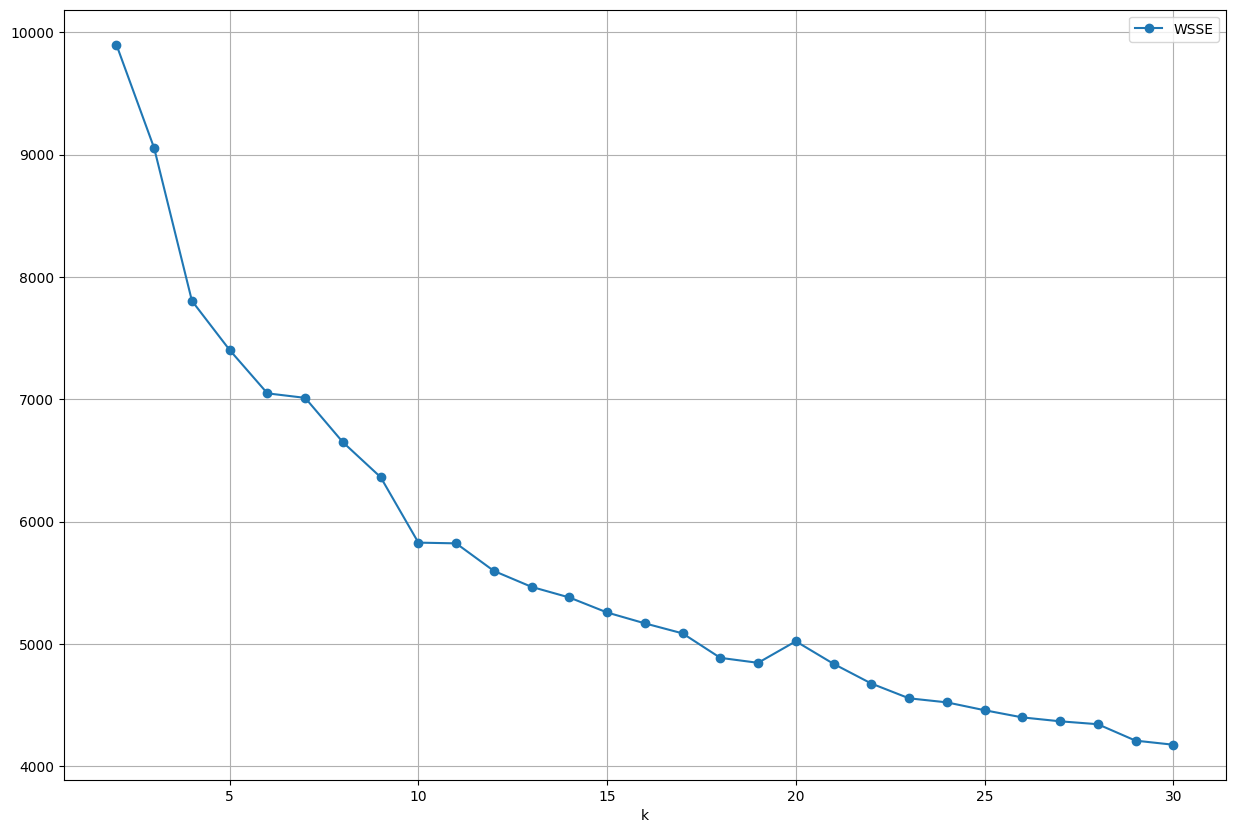

In [38]:
#################### KMEANS 
featuresUsed = ["platformType_indexed","teamLevel","hitter","spender", "count_gameclicks_total","avg_price_total","count_hits_total"]

# featuresUsed = ['count_gameclicks', 'count_hits' ]
from pyspark.ml.feature import VectorAssembler


assembler = VectorAssembler(inputCols=featuresUsed, outputCol="features_unscaled")
assembled_feature = assembler.transform(combined_grouped_df_indexed)


# SCALE THE DATA TO STANDARDIZE DIFFERENT UNITS
scaler = StandardScaler(inputCol="features_unscaled", outputCol="features", withStd=True, withMean=True)
scalerModel = scaler.fit(assembled_feature)
scaledData = scalerModel.transform(assembled_feature)



# assembled_feature.show()

elbowset = scaledData.select("features","platformType_indexed","count_gameclicks_total","avg_price_total","count_hits_total","teamLevel")
clusters = range(2,31)

wsseList = elbow(elbowset, clusters)


# PLOT ELBOW METHOD
elbow_plot(wsseList, clusters)



# SELECT FEATURE COLUMN
scaledDataFeat = scaledData.select("features","teamLevel", "platformType_indexed","count_gameclicks_total","avg_price_total","count_hits_total","spender","hitter")
scaledDataFeat.persist()


### TRAIN KMEANS MODEL WITH !2 CLusters
kmeans = KMeans(k=5, seed=1)
model = kmeans.fit(scaledDataFeat)
transformed = model.transform(scaledDataFeat)

## GET CENTERIODS
centers = model.clusterCenters()
centers


P = pd_centers(featuresUsed, centers)

P.head()













In [39]:
transformed.show()
centers

+--------------------+---------+--------------------+----------------------+---------------+----------------+-------+------+----------+
|            features|teamLevel|platformType_indexed|count_gameclicks_total|avg_price_total|count_hits_total|spender|hitter|prediction|
+--------------------+---------+--------------------+----------------------+---------------+----------------+-------+------+----------+
|[0.05614147219518...|        1|                 1.0|                   669|            0.0|              74|      0|     1|         0|
|[-0.8902726156499...|        1|                 0.0|                   403|           37.5|              58|      0|     1|         0|
|[-0.8902726156499...|        1|                 0.0|                   289|            0.0|              25|      0|     0|         4|
|[0.05614147219518...|        1|                 1.0|                   371|           13.0|              41|      0|     1|         0|
|[0.05614147219518...|        1|                

[array([-0.15907806, -0.03636503,  0.56003647, -0.37215053, -0.21732124,
        -0.1600847 , -0.17990985]),
 array([ 0.14750323, -0.45360234,  0.28719822, -0.13745186,  2.53035053,
        -0.0548085 ,  2.51408176]),
 array([ 2.3602386 ,  0.00424472, -0.20124819, -0.29208106, -0.24600105,
        -0.39919541, -0.26102093]),
 array([-0.75155886,  0.30198308,  0.3903432 ,  2.56166   , -0.20978065,
         1.79067607, -0.10433334]),
 array([-0.1950345 ,  0.11889969, -1.78521144, -0.35844995, -0.32858808,
        -0.45484407, -0.47903675])]

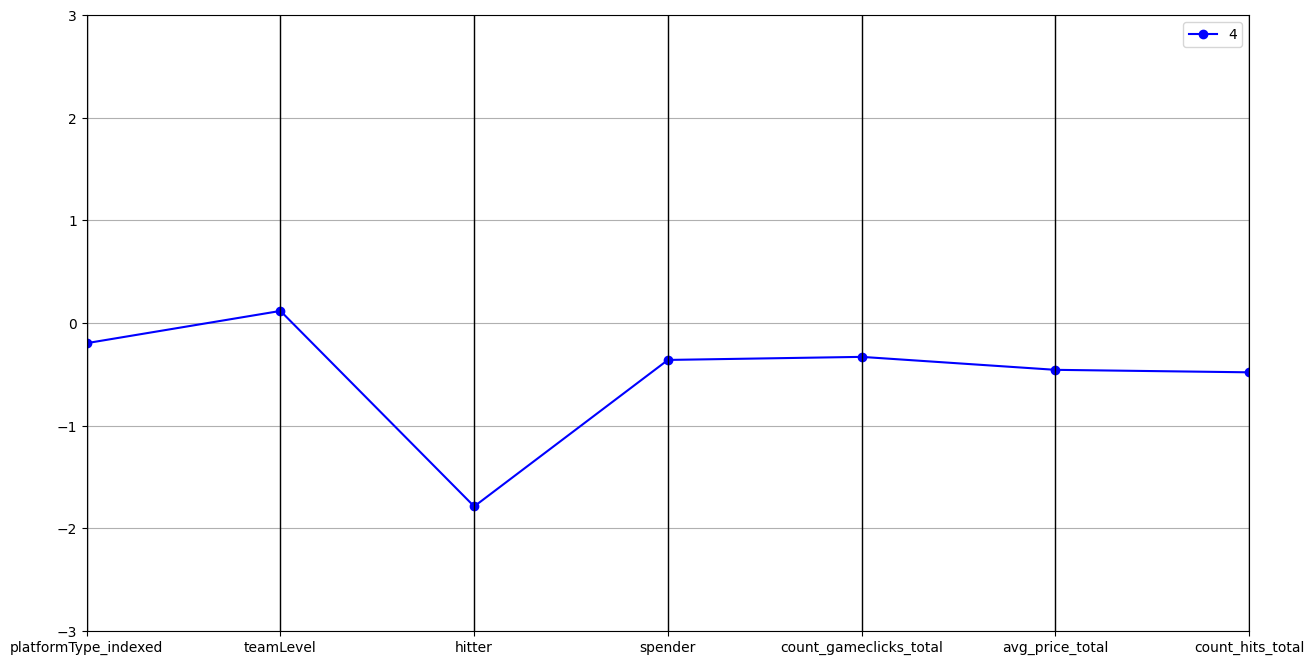

In [40]:
parallel_plot(P[P['hitter'] < -0.5], P)

In [42]:
from pyspark.ml.feature import VectorAssembler

# Create an assembler object
featuresUsed = ["avg_price_total",
 'teamLevel',
"platformType_indexed"
 ]



assembler = VectorAssembler(inputCols=featuresUsed,  outputCol='features')
assembled = assembler.transform(combined_grouped_df_indexed)


# assembled  = assembled.select(featuresUsed)
# Split into training and test sets in a 80:20 ratio
combined_grouped_data_train, combined_grouped_data_test = assembled.randomSplit([0.8, 0.2], seed=17)



# Check the resulting column
combined_grouped_data_train.show(5, truncate=False)




+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+-----------------+------+--------------------+-------------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|total             |spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|Percent          |hitter|platformType_indexed|features     |
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+-----------------+------+--------------------+-------------+
|0     |24943        |2        |iphone      |353             |35        |NULL       |NULL     |10179.410000000002|0      |0     |1240                  |124             |0.0            |10.0             |0     |0.0                 |[0.0,2.0,0.0]|
|0     |28377   

In [44]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
################ LOGISTIC REGRESSIOn FOR Spender

from pyspark.ml.classification import LogisticRegression

# Selecting numeric columns
# Create an assembler object
featuresUsed = ["count_hits_total",
 'teamLevel',
"platformType_indexed"
 ]



assembler = VectorAssembler(inputCols=featuresUsed,  outputCol='features')
assembled = assembler.transform(combined_grouped_df_indexed)


# assembled  = assembled.select(featuresUsed)
# Split into training and test sets in a 80:20 ratio
combined_grouped_data_train, combined_grouped_data_test = assembled.randomSplit([0.8, 0.2], seed=17)





# Create classifier object and train on training data
logistic = LogisticRegression(labelCol='spender').fit(combined_grouped_data_train)

# Create a predictions for the test data and show confusion matrix
prediction = logistic.transform(combined_grouped_data_test)
prediction.groupBy("spender", "prediction").count().show()







+-------+----------+-----+
|spender|prediction|count|
+-------+----------+-----+
|      0|       0.0|  821|
|      1|       0.0|  112|
|      1|       1.0|    1|
+-------+----------+-----+



In [52]:
#  Calculate the elements of the confusion matrix FOR SPENDER
TN = prediction.filter('prediction = 0 AND spender = prediction').count()
TP = prediction.filter('prediction = 1 AND spender = prediction').count()
FN = prediction.filter('prediction = 0 AND spender = 1').count()
FP = prediction.filter('prediction = 1 AND spender = 0').count()



# Accuracy measures the proportion of correct predictions FOR SPENDER
accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)




0.880085653104925


In [53]:

from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

# Calculate precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('precision = {:.2f}\nrecall   = {:.2f}'.format(precision, recall))

# Find weighted precision
multi_evaluator = MulticlassClassificationEvaluator().setLabelCol("spender")
weighted_precision = multi_evaluator.evaluate(prediction, {multi_evaluator.metricName: "weightedPrecision"})

# Find AUC
binary_evaluator = BinaryClassificationEvaluator().setLabelCol("spender")
auc = binary_evaluator.evaluate(prediction, {binary_evaluator.metricName: "areaUnderROC"})

print(auc)
print(weighted_precision)


precision = 1.00
recall   = 0.01
0.8175708449656757
0.894480515754709


In [ ]:
############## LOGISTIC REGRESSION FOR HITTER

In [54]:

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler

# Create an assembler object
featuresUsed = ["avg_price_total",
 'teamLevel',
"spender",
"platformType_indexed"
 ]



assembler = VectorAssembler(inputCols=featuresUsed,  outputCol='features')
assembled = assembler.transform(combined_grouped_df_indexed)


# assembled  = assembled.select(featuresUsed)
# Split into training and test sets in a 80:20 ratio
combined_grouped_data_train, combined_grouped_data_test = assembled.randomSplit([0.8, 0.2], seed=17)



# Create classifier object and train on training data
logistic = LogisticRegression(labelCol='hitter').fit(combined_grouped_data_train)

# Create a predictions for the test data and show confusion matrix
prediction = logistic.transform(combined_grouped_data_test)
prediction.groupBy("hitter", "prediction").count().show()



+------+----------+-----+
|hitter|prediction|count|
+------+----------+-----+
|     0|       1.0|  209|
|     1|       1.0|  725|
+------+----------+-----+



In [55]:
#  Calculate the elements of the confusion matrix FOR HITTER
TN = prediction.filter('prediction = 0 AND hitter = prediction').count()
TP = prediction.filter('prediction = 1 AND hitter = prediction').count()
FN = prediction.filter('prediction = 0 AND hitter = 1').count()
FP = prediction.filter('prediction = 1 AND hitter = 0').count()





# Accuracy measures the proportion of correct predictions FOR SPENDER
accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)


0.7762312633832976


In [56]:

from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

# Calculate precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('precision = {:.2f}\nrecall   = {:.2f}'.format(precision, recall))

# Find weighted precision
multi_evaluator = MulticlassClassificationEvaluator().setLabelCol("hitter")
weighted_precision = multi_evaluator.evaluate(prediction, {multi_evaluator.metricName: "weightedPrecision"})

# Find AUC
binary_evaluator = BinaryClassificationEvaluator().setLabelCol("hitter")
auc = binary_evaluator.evaluate(prediction, {binary_evaluator.metricName: "areaUnderROC"})

print(auc)
print(weighted_precision)


precision = 0.78
recall   = 1.00
0.6587460815047023
0.6025349742536303


In [57]:
kmeans = KMeans(k=12, seed=1)
model = kmeans.fit(scaledDataFeat)
transformed = model.transform(scaledDataFeat)

In [58]:
centers = model.clusterCenters()
centers

[array([ 1.5087074 , -0.94115246,  0.56003647, -0.32375411,  0.08412678,
        -0.36923812,  0.11535971]),
 array([ 0.17997135, -0.37904643,  0.39930296, -0.1148806 ,  2.79178071,
        -0.0463757 ,  2.78473048]),
 array([-0.7948359 , -0.98381912,  0.5403285 ,  2.686503  , -0.01166062,
         2.28345126,  0.15971486]),
 array([ 1.5386004 ,  0.77688622,  0.56003647, -0.34728342, -0.40413587,
        -0.40163874, -0.36280157]),
 array([-0.29017206, -0.87418978, -1.78521144, -0.37215053,  0.13492813,
        -0.44312182, -0.06518979]),
 array([-0.61879128,  0.73219876,  0.16760455,  2.686503  , -0.46197482,
         0.74694244, -0.41823514]),
 array([-0.36085307,  0.78475368, -1.78521144, -0.37215053, -0.58468759,
        -0.45770486, -0.70918347]),
 array([ 1.77451544,  0.17194248, -1.78521144, -0.34396017, -0.25671494,
        -0.47497391, -0.4140721 ]),
 array([-0.87806082,  0.73365445,  0.56003647,  2.686503  ,  0.08124872,
         2.79058486,  0.23885763]),
 array([-0.34143002